Part 1: SVM Examples

Example 1: Iris Dataset

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


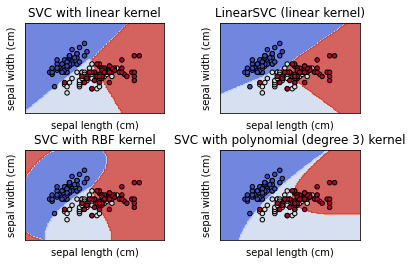

In [14]:
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.inspection import DecisionBoundaryDisplay


# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target


# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (
    svm.SVC(kernel="linear", C=C),
    svm.LinearSVC(C=C, max_iter=10000),
    svm.SVC(kernel="rbf", gamma=0.7, C=C),
    svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),
)
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = (
    "SVC with linear kernel",
    "LinearSVC (linear kernel)",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",
)

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]

for clf, title, ax in zip(models, titles, sub.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
    )
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

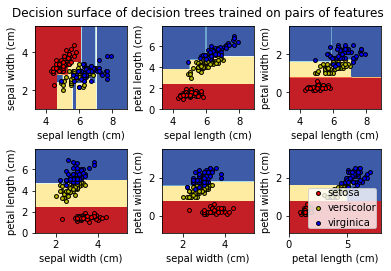

In [72]:
from sklearn.datasets import load_iris

iris = load_iris()

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import DecisionBoundaryDisplay
# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02


for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    ax = plt.subplot(2, 3, pairidx + 1)
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        cmap=plt.cm.RdYlBu,
        response_method="predict",
        ax=ax,
        xlabel=iris.feature_names[pair[0]],
        ylabel=iris.feature_names[pair[1]],
    )

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(
            X[idx, 0],
            X[idx, 1],
            c=color,
            label=iris.target_names[i],
            cmap=plt.cm.RdYlBu,
            edgecolor="black",
            s=15,
        )

plt.suptitle("Decision surface of decision trees trained on pairs of features")
plt.legend(loc="lower right", borderpad=0, handletextpad=0)
_ = plt.axis("tight")

Example 2: Libsvm GUI

Example 3: Audio Classification

In [15]:
#Imports + definitions

from math import *
import random
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from scipy.io import wavfile
from scipy.fftpack import fft
from scipy import signal
import winsound
from scipy.io.wavfile import write
import sounddevice as sd
import scipy as sci
import pickle
import os
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.model_selection import GridSearchCV

class_count = 10
sample_rate = 8000


def preprocess_audiosample(sample):
	preprocessed_sample = butter_medfilt_denoise(sample)
	preprocessed_sample = pad_signal(preprocessed_sample)
	return preprocessed_sample

def butter_medfilt_denoise(sample, freqs = [50, 1700], order = 6):
	sos = signal.butter(order, freqs, btype='bandpass',fs=sample_rate, output='sos')
	filtered = signal.sosfilt(sos, sample)
	med = signal.medfilt(filtered)
	med = med/np.max(np.abs(med))
	return med

def pad_signal(sample, new_len = 20000):
	return np.pad(sample, (0, new_len-len(sample)))


def read_preprocess_data(data_path):
	x = []
	y = []
	for i in range(class_count):
		fp = os.path.join(os.getcwd(),data_path, str(i))
		for filename in os.listdir(fp):
			dp = os.path.join(fp, filename)
			sample1 = wavfile.read(dp)
			sample = sample1[1]
			preprocessed_sample = preprocess_audiosample(sample)
			x.append(preprocessed_sample)
			y.append(i)
	
	x = np.array(x)
	y = np.ravel(np.array(y))

	return x, y
	


In [30]:
from sklearn.svm import SVC
x, y = read_preprocess_data(os.path.join('dataset','train'))
model = SVC().fit(x,y)

In [35]:
y_pred = model.predict(x)
print("Train accuracy is: ", metrics.accuracy_score(y, y_pred))

Train accuracy is:  0.874


In [36]:
x, y = read_preprocess_data(os.path.join('dataset','test'))
y_pred = model.predict(x)
print("Test accuracy is: ", metrics.accuracy_score(y, y_pred))

Test accuracy is:  0.29


In [70]:
x, y = read_preprocess_data(os.path.join('dataset','test'))

params = {'n_estimators':[80,100,120], 'max_depth':[3,6,9], 'min_samples_split':[2,4,6]}
grid = GridSearchCV(rfc(), params,refit=True, verbose=3, cv=5)
grid.fit(x,y)

print(grid.best_estimator_)
print(grid.best_score_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5] END max_depth=3, min_samples_split=2, n_estimators=80;, score=0.240 total time=   0.3s
[CV 2/5] END max_depth=3, min_samples_split=2, n_estimators=80;, score=0.230 total time=   0.2s
[CV 3/5] END max_depth=3, min_samples_split=2, n_estimators=80;, score=0.280 total time=   0.2s
[CV 4/5] END max_depth=3, min_samples_split=2, n_estimators=80;, score=0.310 total time=   0.2s
[CV 5/5] END max_depth=3, min_samples_split=2, n_estimators=80;, score=0.270 total time=   0.2s
[CV 1/5] END max_depth=3, min_samples_split=2, n_estimators=100;, score=0.180 total time=   0.3s
[CV 2/5] END max_depth=3, min_samples_split=2, n_estimators=100;, score=0.230 total time=   0.3s
[CV 3/5] END max_depth=3, min_samples_split=2, n_estimators=100;, score=0.300 total time=   0.3s
[CV 4/5] END max_depth=3, min_samples_split=2, n_estimators=100;, score=0.210 total time=   0.3s
[CV 5/5] END max_depth=3, min_samples_split=2, n_estimators=100;, scor

In [43]:
from sklearn.svm import SVC

def extract_features(x):
    x_spect = []
    for xx in x:
        _,_, Sxx = signal.spectrogram(xx, sample_rate, window = signal.windows.hann(125))
        x_spect.append(np.ravel(Sxx))
    x_spect = np.array(x_spect)
    return x_spect

def Predict(data_path, model):
    # with open(model_path, 'rb') as f:
    #     model = pickle.load(f)
    x, y = read_preprocess_data(data_path)
    x_new = extract_features(x)
    y_pred = model.predict(x_new)
    print("Accuracy is: ", metrics.accuracy_score(y, y_pred))
    
    import seaborn as sb
    from sklearn.metrics import confusion_matrix
    plt.subplots(figsize=(10, 6))
    sb.heatmap(confusion_matrix(y, y_pred), annot = True, fmt = 'g')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

x, y = read_preprocess_data(os.path.join('dataset','train'))
x_new = extract_features(x)
model = SVC(C=10).fit(x_new, y)





Accuracy is:  0.81


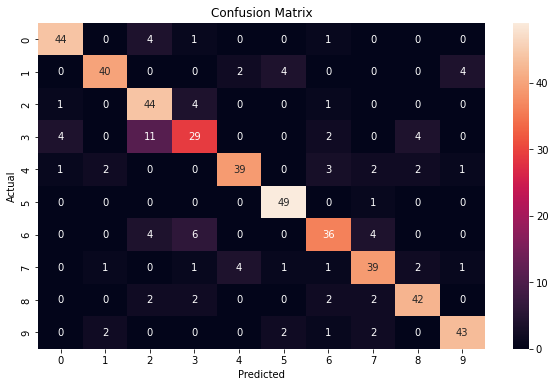

In [44]:
Predict(os.path.join('dataset','test'), model)

In [47]:
from xgboost import XGBClassifier as xgbc
x, y = read_preprocess_data(os.path.join('dataset','train'))
x_new = extract_features(x)
model = xgbc().fit(x_new,y)

Accuracy is:  0.912


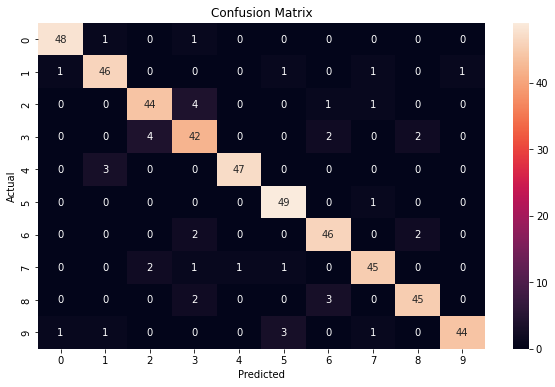

In [48]:
Predict(os.path.join('dataset','test'), model)


Part 2: Cross-Validation, EEG Signal Classification With SVM


In [51]:
from math import *
import random
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from scipy.fftpack import fft
from scipy import signal
import scipy as sci
import pickle
import os
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

The data are time series stored in matlab arrays.

In [52]:
import scipy.io
mat = scipy.io.loadmat('data_Train_TrainLabel_Test.mat')
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'EEG_train', 'EEG_train_label', 'EEG_test', 'fs'])

In [53]:
X_train = mat['EEG_train']
Y_train = mat['EEG_train_label']

print(X_train.shape)

(6, 1000, 90)


Reshape data into a 3d tensor with shape (samples, channels, features (time samples))

In [54]:
X_train = np.swapaxes(X_train,0,1)
X_train = np.swapaxes(X_train, 0,2)
print(X_train.shape)

(90, 6, 1000)


Extract features

In [55]:
X_train_welch =[]
#sampling rate
fs = 250
#for each sample
for xx in X_train:
    #for each channel
    sample_features = np.array([0]).reshape(1,1)
    for c in xx:
        #extract signal features and concatenate
        _, Pxx_den = signal.welch(c.reshape(1,-1), fs, window = signal.windows.hann(200))
        sample_features=np.hstack((sample_features, Pxx_den))
    X_train_welch.append(sample_features)


X_train_welch = np.array(X_train_welch)
print(X_train_welch.shape)

(90, 1, 607)


Slight adjustments to the dimensions of numpy arrays

In [56]:
X_train_welch = np.squeeze(X_train_welch)
Y_train = Y_train.ravel()

Gridsearch with cross-validation

In [29]:
params = {'kernel':['rbf', 'poly', 'linear'], 'C':[0.1,0.5,1,2,4,8], 'gamma':[0.05, 0.1, 1, 2, 5], 'degree':[1,2,3,4]}
grid = GridSearchCV(SVC(), params,refit=True, verbose=3, cv=5)

grid.fit(X_train_welch, Y_train)
print(grid.best_estimator_)
print(grid.best_score_)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits
[CV 1/5] END C=0.1, degree=1, gamma=0.05, kernel=rbf;, score=0.556 total time=   0.0s
[CV 2/5] END C=0.1, degree=1, gamma=0.05, kernel=rbf;, score=0.611 total time=   0.0s
[CV 3/5] END C=0.1, degree=1, gamma=0.05, kernel=rbf;, score=0.500 total time=   0.0s
[CV 4/5] END C=0.1, degree=1, gamma=0.05, kernel=rbf;, score=0.556 total time=   0.0s
[CV 5/5] END C=0.1, degree=1, gamma=0.05, kernel=rbf;, score=0.611 total time=   0.0s
[CV 1/5] END C=0.1, degree=1, gamma=0.05, kernel=poly;, score=0.500 total time=   0.0s
[CV 2/5] END C=0.1, degree=1, gamma=0.05, kernel=poly;, score=0.556 total time=   0.0s
[CV 3/5] END C=0.1, degree=1, gamma=0.05, kernel=poly;, score=0.500 total time=   0.0s
[CV 4/5] END C=0.1, degree=1, gamma=0.05, kernel=poly;, score=0.556 total time=   0.0s
[CV 5/5] END C=0.1, degree=1, gamma=0.05, kernel=poly;, score=0.667 total time=   0.0s
[CV 1/5] END C=0.1, degree=1, gamma=0.05, kernel=linear;, score=0.667 t

In [64]:
from xgboost import XGBClassifier as xgbc

#replace class -1 with 0
Y_train[Y_train==-1]=0

params = {'eta':[0.05 ,0.1, 0.3] ,'n_estimators':[80,100,120], 'max_depth':[3,6,9], 'subsample':[0.8,1]}
grid = GridSearchCV(xgbc(), params,refit=True, verbose=3, cv=5)

grid.fit(X_train_welch, Y_train)
print(grid.best_estimator_)
print(grid.best_score_)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV 1/5] END eta=0.05, max_depth=3, n_estimators=80, subsample=0.8;, score=0.889 total time=   0.0s
[CV 2/5] END eta=0.05, max_depth=3, n_estimators=80, subsample=0.8;, score=0.944 total time=   0.0s
[CV 3/5] END eta=0.05, max_depth=3, n_estimators=80, subsample=0.8;, score=0.889 total time=   0.0s
[CV 4/5] END eta=0.05, max_depth=3, n_estimators=80, subsample=0.8;, score=0.722 total time=   0.0s
[CV 5/5] END eta=0.05, max_depth=3, n_estimators=80, subsample=0.8;, score=0.889 total time=   0.0s
[CV 1/5] END eta=0.05, max_depth=3, n_estimators=80, subsample=1;, score=0.889 total time=   0.0s
[CV 2/5] END eta=0.05, max_depth=3, n_estimators=80, subsample=1;, score=0.944 total time=   0.0s
[CV 3/5] END eta=0.05, max_depth=3, n_estimators=80, subsample=1;, score=0.889 total time=   0.0s
[CV 4/5] END eta=0.05, max_depth=3, n_estimators=80, subsample=1;, score=0.722 total time=   0.0s
[CV 5/5] END eta=0.05, max_depth=3, n_estimato

In [67]:
#replace class -1 with 0
Y_train[Y_train==-1]=0

params = {'n_estimators':[80,100,120], 'max_depth':[3,6,9], 'min_samples_split':[2,4,6]}
grid = GridSearchCV(rfc(), params,refit=True, verbose=3, cv=5)

grid.fit(X_train_welch, Y_train)
print(grid.best_estimator_)
print(grid.best_score_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5] END max_depth=3, min_samples_split=2, n_estimators=80;, score=0.889 total time=   0.0s
[CV 2/5] END max_depth=3, min_samples_split=2, n_estimators=80;, score=0.833 total time=   0.0s
[CV 3/5] END max_depth=3, min_samples_split=2, n_estimators=80;, score=0.667 total time=   0.0s
[CV 4/5] END max_depth=3, min_samples_split=2, n_estimators=80;, score=0.778 total time=   0.0s
[CV 5/5] END max_depth=3, min_samples_split=2, n_estimators=80;, score=0.944 total time=   0.0s
[CV 1/5] END max_depth=3, min_samples_split=2, n_estimators=100;, score=0.889 total time=   0.0s
[CV 2/5] END max_depth=3, min_samples_split=2, n_estimators=100;, score=0.889 total time=   0.0s
[CV 3/5] END max_depth=3, min_samples_split=2, n_estimators=100;, score=0.667 total time=   0.0s
[CV 4/5] END max_depth=3, min_samples_split=2, n_estimators=100;, score=0.722 total time=   0.0s
[CV 5/5] END max_depth=3, min_samples_split=2, n_estimators=100;, scor